In [2]:
import numpy as np
from data1 import data,x,y,z
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from pyowl import OwlRegressor
from mpl_toolkits.mplot3d import Axes3D
from laplace import get_laplace, knn_laplace, extend_knn,cordinate
from kMeans import kMeans, min_k_index
import copy
from sklearn import linear_model

In [2]:
def store(coef,B,index):
    n=len(coef)
    if index == 0:
        for i in range(n):
            B[i+1,index]=coef[i]
    elif index==n:
        for i in range(n):
            B[i,index]=coef[i]
    else:
        for i in range(index):
            B[i,index]=coef[i]
        for i in range(index,n):
            B[i+1,index]=coef[i]
    return B

In [3]:
def reshapeL(l):
    n=len(l)
    m=len(l[0])
    L=[]
    for i in range(m):
        x=[]
        for j in range(n):
            x.append(X[j][i])
        L.append(x)
    return L

In [4]:
n_sample=len(data[0])
n_feature=len(data)

In [5]:
alpha=0.0001
beta=0.01
k=n_feature

In [6]:
indexs=np.random.choice(range(n_feature),k)
B=np.zeros((n_feature,n_feature))

In [7]:
# oscar owl mentioned in paper
def get_B(data,indexs,B,alpha,beta):
    n_sample=len(data[0])
    n_feature=len(data)
    for index in indexs:
        X=np.zeros((n_sample,n_feature-1))
        if index == 0:
            for i in range(n_feature-1):
                X[:,i]=data[i+1]
        elif index == n_feature-1:
            for i in range(n_feature-1):
                X[:,i]=data[i]
        else:
            for i in range(index):
                X[:,i]=data[i]
            for i in range(index,n_feature):
                X[:,i-1]=data[i]
        Y=np.array(data[index])
        oscar_owl = OwlRegressor(weights=(alpha,beta))
        oscar_owl.fit(X,Y)
        B=store(oscar_owl.coef_,B,index)
    return B

In [8]:
B=get_B(data,indexs,B,alpha,beta)
B=np.abs(B)
W=B+B.T

In [9]:
L=get_laplace(W)

In [10]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

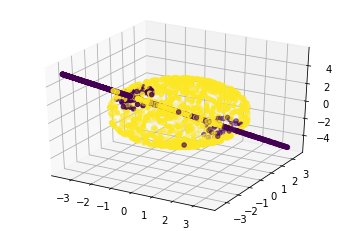

In [11]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=v[:,min_k_index(u,2)])

In [12]:
mdat1=np.zeros((2000,1))
mdat1[:,0]=v[:,min_k_index(u,2)]

In [13]:
pre_idx1=kMeans(mdat1,2)[:,0]

In [14]:
x_1=[]
y_1=[]
z_1=[]
x_2=[]
y_2=[]
z_2=[]
data_1=[]
data_2=[]
for i in range(len(pre_idx1)):
    if pre_idx1[i]==0:
        x_1.append(x[i])
        y_1.append(y[i])
        z_1.append(z[i])
        data_1.append(data[i])
    else:
        x_2.append(x[i])
        y_2.append(y[i])
        z_2.append(z[i])
        data_2.append(data[i])

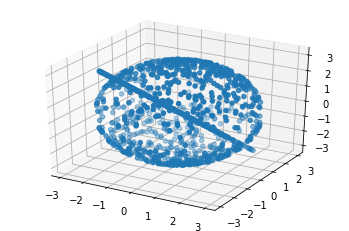

In [15]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_1,y_1,z_1)

In [16]:
n_f2=len(data_2)
indexs2=np.random.choice(range(n_f2),k)
B2=np.zeros((n_f2,n_f2))

In [17]:
B2=get_B(data_2,indexs2,B2,alpha,beta)
B2=np.abs(B2)
W2=B2+B2.T

In [18]:
L2=get_laplace(W2)
u2,v2=np.linalg.eig(L2)
u2=np.real(u2)
v2=np.real(v2)

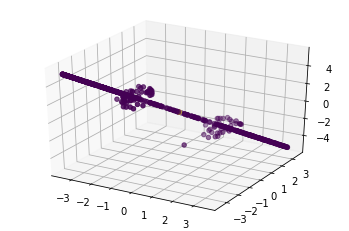

In [19]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_2,y_2,z_2,c=v2[:,min_k_index(u2,2)])

In [20]:
mdat3=np.zeros((n_f2,1))
mdat3[:,0]=v2[:,min_k_index(u2,2)]
pre_idx3=kMeans(mdat3,2)[:,0]

In [21]:
x_3=[]
y_3=[]
z_3=[]
x_4=[]
y_4=[]
z_4=[]
data_3=[]
data_4=[]
for i in range(len(pre_idx3)):
    if pre_idx3[i]==0:
        x_3.append(x_2[i])
        y_3.append(y_2[i])
        z_3.append(z_2[i])
        data_3.append(data_2[i])
    else:
        x_4.append(x_2[i])
        y_4.append(y_2[i])
        z_4.append(z_2[i])
        data_4.append(data_2[i])

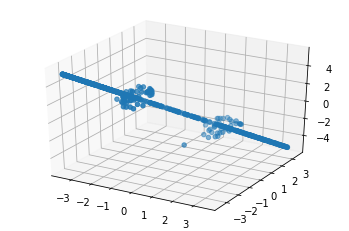

In [22]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_4,y_4,z_4)

In [23]:
n_f3=len(data_4)
indexs3=np.random.choice(range(n_f3),k)
B3=np.zeros((n_f3,n_f3))

B3=get_B(data_4,indexs3,B3,alpha,beta)
B3=np.abs(B3)
W3=B3+B3.T

L3=get_laplace(W3)
u3,v3=np.linalg.eig(L3)
u3=np.real(u3)
v3=np.real(v3)

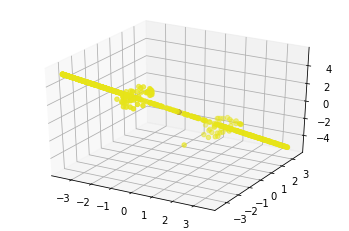

In [24]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_4,y_4,z_4,c=v3[:,min_k_index(u3,2)])

In [25]:
mdat4=np.zeros((n_f3,1))
mdat4[:,0]=v3[:,min_k_index(u3,2)]
pre_idx4=kMeans(mdat4,2)[:,0]

x_5=[]
y_5=[]
z_5=[]
x_6=[]
y_6=[]
z_6=[]
data_5=[]
data_6=[]
for i in range(len(pre_idx4)):
    if pre_idx4[i]==0:
        x_5.append(x_4[i])
        y_5.append(y_4[i])
        z_5.append(z_4[i])
        data_5.append(data_4[i])
    else:
        x_6.append(x_4[i])
        y_6.append(y_4[i])
        z_6.append(z_4[i])
        data_6.append(data_4[i])

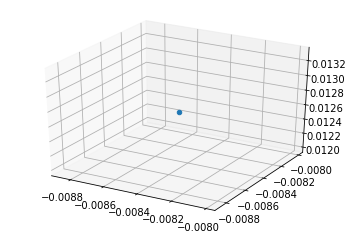

In [26]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_5,y_5,z_5)

In [27]:
L1=knn_laplace(data_5,8)
u1,v1=np.linalg.eig(L1)
u1=np.real(u1)
v1=np.real(v1)

In [28]:
n=len(data_5)

In [29]:
mdat2=np.zeros((n,3))
mdat2[:,0]=v1[:,min_k_index(u1,1)]
mdat2[:,1]=v1[:,min_k_index(u1,2)]
mdat2[:,2]=v1[:,min_k_index(u1,3)]

ValueError: min() arg is an empty sequence

In [ ]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_5,y_5,z_5,c=v1[:,min_k_index(u1,4)])

In [ ]:
mdat5=np.zeros((n,3))
mdat5[:,0]=v1[:,min_k_index(u1,1)]
mdat5[:,1]=v1[:,min_k_index(u1,2)]
mdat5[:,2]=v1[:,min_k_index(u1,3)]

In [ ]:
pre_idx5=kMeans(mdat5,2)[:,0]

In [ ]:
a_1=[]
b_1=[]
c_1=[]
a_2=[]
b_2=[]
c_2=[]
dat_1=[]
dat_2=[]
for i in range(len(pre_idx5)):
    if pre_idx5[i]==0:
        a_1.append(x_5[i])
        b_1.append(y_5[i])
        c_1.append(z_5[i])
        dat_1.append(data_5[i])
    else:
        a_2.append(x_5[i])
        b_2.append(y_5[i])
        c_2.append(z_5[i])
        dat_2.append(data_5[i])

In [ ]:
ax=plt.subplot(111, projection='3d')
ax.scatter(a_2,b_2,c_2)

In [ ]:
c,d=extend_knn(dat_2,dat_1,4)

In [ ]:
for i in range(3):
    c,d=extend_knn(c,d,4)

In [ ]:
d_c=cordinate(d,3)
ax=plt.subplot(111,projection="3d")
ax.scatter(d_c[0],d_c[1],d_c[2])

In [ ]:
c_c=cordinate(c,3)
ax=plt.subplot(111,projection="3d")
ax.scatter(c_c[0],c_c[1],c_c[2])

In [ ]:
line=copy.deepcopy(data_1)
line.extend(data_4)
line.extend(data_6)
line.extend(c)

In [ ]:
line_c=cordinate(line,3)
ax=plt.subplot(111,projection="3d")
ax.scatter(line_c[0],line_c[1],line_c[2])

In [ ]:
sphere=copy.deepcopy(d)

In [ ]:
sphere_c=cordinate(sphere,3)
ax=plt.subplot(111,projection="3d")
ax.scatter(sphere_c[0],sphere_c[1],sphere_c[2])